# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Sahanatur Rizki
- Email: Sahanaturrizki@gmail.com
- Id Dicoding: kikio96

## Menentukan Pertanyaan Bisnis

- **Kapan waktu dengan jumlah penyewaan sepeda tertinggi dan terendah?**  
- **Apakah pengguna registered lebih sering menyewa sepeda pada jam tertentu dibandingkan pengguna casual?**  
- **Apakah suhu dan kelembaban memiliki dampak signifikan terhadap jumlah penyewaan?**

## Menyiapkan semua library yang dibutuhkan

In [1]:
# Menanmbahkan Semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Menambahkan data tabel hari
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Menambahkan data tabel waktu per jam
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam tabel waktu per jam dan hari
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# mengecek keberadaan missing value dan duplikasi di dataset waktu per jam
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# mengecek keberadaan missing value dan duplikasi di dataset waktu per hari
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dapat kita lihat bersama bahwa tidak ada missing value dan ata yang terduplikat di dataframe hour_df dan day_df

In [8]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam day_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
# pemeriksaan parameter statistik pada kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

* kita akan menghapus kolom instant dan workingday. untuk workingday menurut saya sudah diwakili oleh weekday, dan untuk instant tidak ada hubungannya
* Mengubah tipe data beberapa kolom menjadi kategori
* kita akan menghandling tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'
* Mengganti nama kolom agar lebih mudah dibaca
* Mengkonversi isi kolom agar mudah dipahami
* Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays

In [10]:
# Mengubah tipe data beberapa kolom menjadi kategori
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for col in columns:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")


Pengubahan ini dilakukan karena sebelumnya kolom tersebut bernilai int, dengan mengubahnya ke nilai category dapat nantinya mempermudah analisis

In [11]:
#mengganti nama kolom agar lebih mudah dibaca
rename_columns_day = {
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_cr',
    'hum': 'humidity',
}

rename_columns_hour = {
    'yr': 'year',
    'hr': 'hours',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_cr',
    'hum': 'humidity'
}

day_df.rename(columns=rename_columns_day, inplace=True)
hour_df.rename(columns=rename_columns_hour, inplace=True)

In [12]:
# Mengkonversi isi kolom agar mudah dipahami
mappings = {
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "month": {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
              7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"},
    "weather_situation": {1: "Clear", 2: "Misty", 3: "Light_rainsnow", 4: "Heavy_rainsnow"},
    "one_of_week": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
                    4: "Thursday", 5: "Friday", 6: "Saturday"},
    "year": {0: "2011", 1: "2012"}
}

# Loop untuk menerapkan perubahan pada kedua DataFrame
for col, mapping in mappings.items():
    day_df[col].replace(mapping, inplace=True)
    hour_df[col].replace(mapping, inplace=True)


<ipython-input-12-ba0e0437089a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df[col].replace(mapping, inplace=True)
<ipython-input-12-ba0e0437089a>:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df[col].replace(mapping, inplace=True)
<ipython-input-12-ba0e0437089a>:15: FutureWarning: A value is tryin

In [13]:
# Konversi suhu dan kelembapan menjadi persen
day_df['temp'] = day_df['temp'] * 41  # Konversi suhu ke persen (jika masih dalam skala 0-1)
day_df['humidity'] = day_df['humidity'] * 100  # Konversi kelembapan ke persen (jika masih dalam skala 0-1)

In [14]:
# Mengubah tipe data kolom yang kurang sesuai
for df in [day_df, hour_df]:
    df['dteday'] = pd.to_datetime(df['dteday'])

In [15]:
# Menghapus Kolom yang tidak diperlukan dalam analisis
columns_to_drop = ['instant', 'workingday']

# Menghapus kolom dari kedua DataFrame
for df in [day_df, hour_df]:
    df.drop(columns=columns_to_drop, axis=1, inplace=True)


## Exploratory Data Analysis (EDA)

### Explore Data hour_df


In [16]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
pivot_hour = hour_df.pivot_table(index='hours', values=['count_cr'], aggfunc=['max', 'min'])
print(pivot_hour)

           max      min
      count_cr count_cr
hours                  
0          283        2
1          168        1
2          132        1
3           79        1
4           28        1
5           66        1
6          213        1
7          596        1
8          839        5
9          426       14
10         539        8
11         663       10
12         776        3
13         760       11
14         750       12
15         750        7
16         783       11
17         976       15
18         977       23
19         743       11
20         567       11
21         584        6
22         502        9
23         256        2


Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang memilliki banyak menyewa sepeda terjadi pada jam 17.00 sedangkan penyewaan sepeda yang paling sedikit dimiliki pada jam 04.00

In [18]:
pivot_hour_cr = hour_df.pivot_table(index='hours', values=['casual', 'registered'], aggfunc=['sum'])
print(pivot_hour_cr)

         sum           
      casual registered
hours                  
0       7375      31755
1       4709      19455
2       3412      12940
3       1893       6281
4        874       3554
5       1012      13249
6       3017      52115
7       8037     146134
8      15761     245240
9      22458     136980
10     33789      92468
11     43286     108034
12     49718     134696
13     52713     132206
14     55089     120563
15     54606     128543
16     53834     173914
17     54220     282640
18     44496     265276
19     35505     191284
20     26378     138172
21     20570     104875
22     16200      79412
23     11065      52876


Berdasarkan pivot table di atas, dapat diketahui bahwa terjadi perbedaan signifikan jumlah penyewaan antara konsumen terdaftar dan biasa.

### Explore Data day_df


In [19]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")


,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
def categorize_temp(temp):
    if temp < 15:
        return "Dingin"
    elif 15 <= temp < 22:
        return "Sejuk"
    elif 22 <= temp < 30:
        return "Hangat"
    else:
        return "Panas"

day_df['temp_category'] = day_df['temp'].apply(categorize_temp)

In [21]:
def categorize_humidity(humidity):
    if humidity < 40:
        return "Kering"
    elif 40 <= humidity < 70:
        return "Normal"
    elif 70 <= humidity < 90:
        return "Lembap"
    else:
        return "Sangat Lembap"

day_df['humidity_category'] = day_df['humidity'].apply(categorize_humidity)


In [22]:
print(day_df[['temp', 'humidity']].describe())

             temp    humidity
count  731.000000  731.000000
mean    20.310776   62.789406
std      7.505091   14.242910
min      2.424346    0.000000
25%     13.820424   52.000000
50%     20.431653   62.666700
75%     26.872076   73.020850
max     35.328347   97.250000


In [23]:
bins_temp = [0, 10, 20, 30, 40]
labels_temp = ['Dingin', 'Sejuk', 'Hangat', 'Panas']
day_df['temp_category'] = pd.cut(day_df['temp'], bins=bins_temp, labels=labels_temp)


In [24]:
bins_humidity = [0, 30, 60, 80, 100]
labels_humidity = ['Kering', 'Sedang', 'Lembap', 'Sangat Lembap']
day_df['humidity_category'] = pd.cut(day_df['humidity'], bins=bins_humidity, labels=labels_humidity)


In [25]:
pivot_table = day_df.pivot_table(
    index='temp_category',
    columns='humidity_category',
    values='count_cr',
    aggfunc='sum'
)

print(pivot_table)

humidity_category  Kering  Sedang  Lembap  Sangat Lembap
temp_category                                           
Dingin                  0   73645   19293           7728
Sejuk               13594  575422  404689         109662
Hangat               5169  601314  896229         195794
Panas                   0  200761  188756              0


<ipython-input-25-cbd1b72c9808>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = day_df.pivot_table(


berdasarkan hasil tersebut, diketahui bahwa kondisi suhu dan kelembapan mempengaruhi jumlah penyewaan.


## Visualization & Explanatory Analysis

- **Kapan waktu dengan jumlah penyewaan sepeda tertinggi dan terendah?**  
- **Apakah pengguna registered lebih sering menyewa sepeda pada jam tertentu dibandingkan pengguna casual?**  
- **Apakah suhu dan kelembaban memiliki dampak signifikan terhadap jumlah penyewaan?**

### Pertanyaan 1: **Kapan waktu dengan jumlah penyewaan sepeda tertinggi dan terendah?**

In [26]:
# Melakukan grouping terhadap 'hours' dan menghitung total 'count_cr'
sum_order_items_df = (
    hour_df.groupby("hours")["count_cr"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)


<ipython-input-27-6311843d09fe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-27-6311843d09fe>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


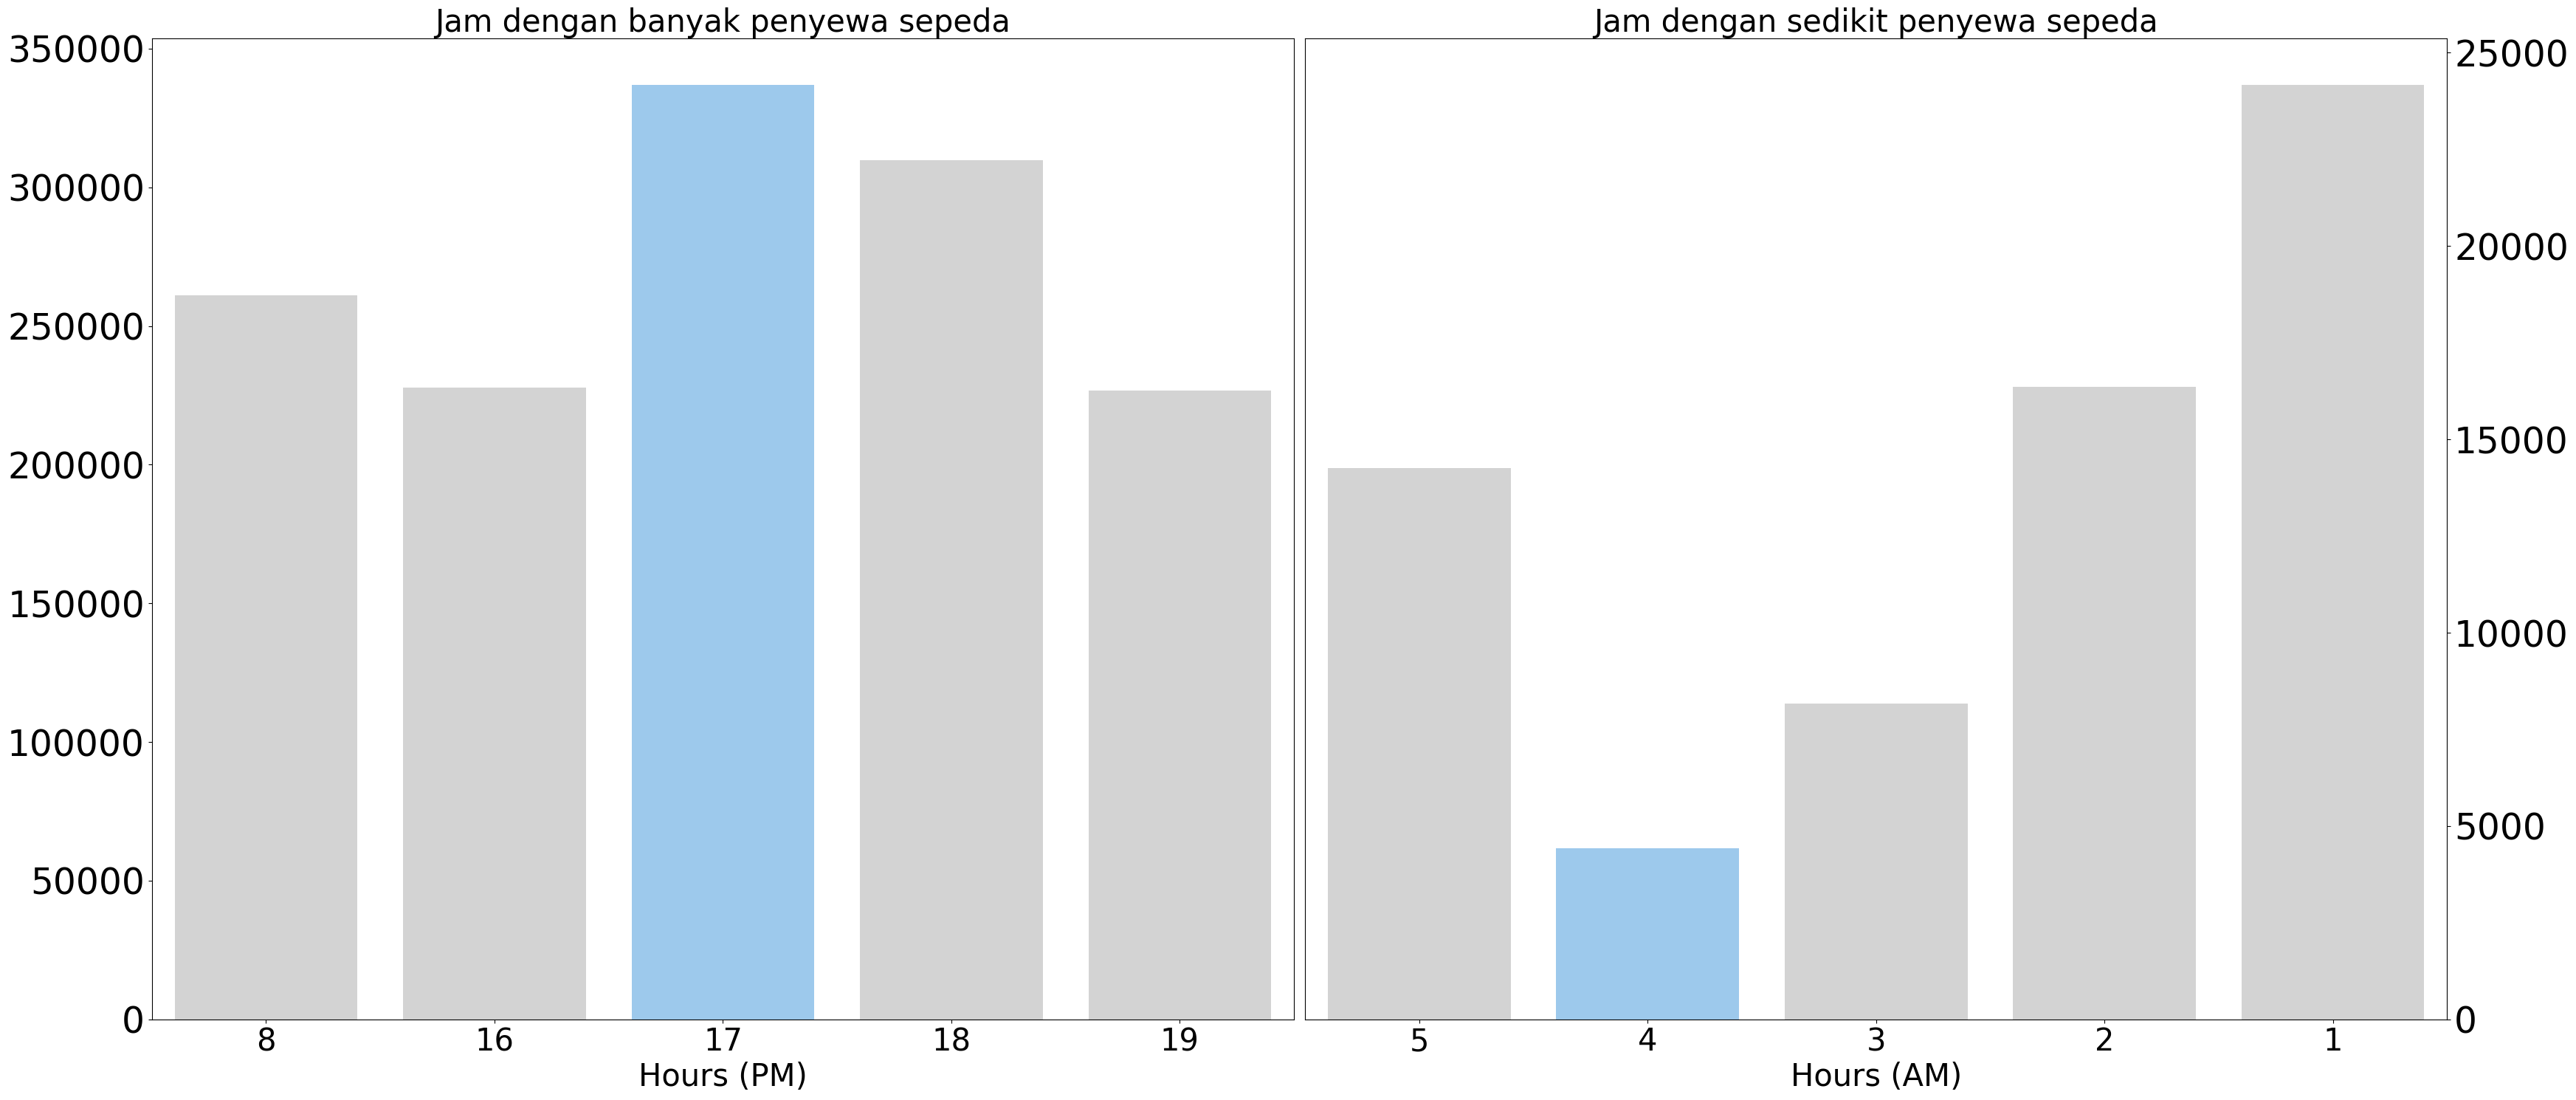

In [27]:
#plot visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Mengambil 5 jam dengan penyewaan sepeda terbanyak
top_hours = sum_order_items_df.nlargest(5, 'count_cr')

# Membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(
    x="hours", y="count_cr", data=top_hours,
    palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0]
)

# Konfigurasi subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# Mengambil 5 jam dengan penyewaan sepeda paling sedikit
low_hours = sum_order_items_df.nsmallest(5, 'count_cr')

# Membuat barplot untuk penyewa sepeda paling sedikit
sns.barplot(
    x="hours", y="count_cr", data=low_hours,
    palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"], ax=ax[1]
)

# Konfigurasi subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)", fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Menyesuaikan layout agar tidak bertabrakan
fig.tight_layout()

# Menampilkan plot
plt.show()

Berdasarkan gambar di atas, Kita dapat melihat bahwa penyewaan sepda paling banyak digunakan pada jam 17:00 sekitar 336860 penyewaan. Kontras dengan hal tersebut, penyewaan pada jam 04:00 merupakan produk yang paling sedikit terjual sekitar 4428 penyewaan.  


### Pertanyaan 2: **Apakah pengguna registered lebih sering menyewa sepeda pada jam tertentu dibandingkan pengguna casual?**

In [28]:
# Grouping berdasarkan jam untuk registered dan casual
hourly_usage = hour_df.groupby("hours")[["registered", "casual"]].sum().reset_index()


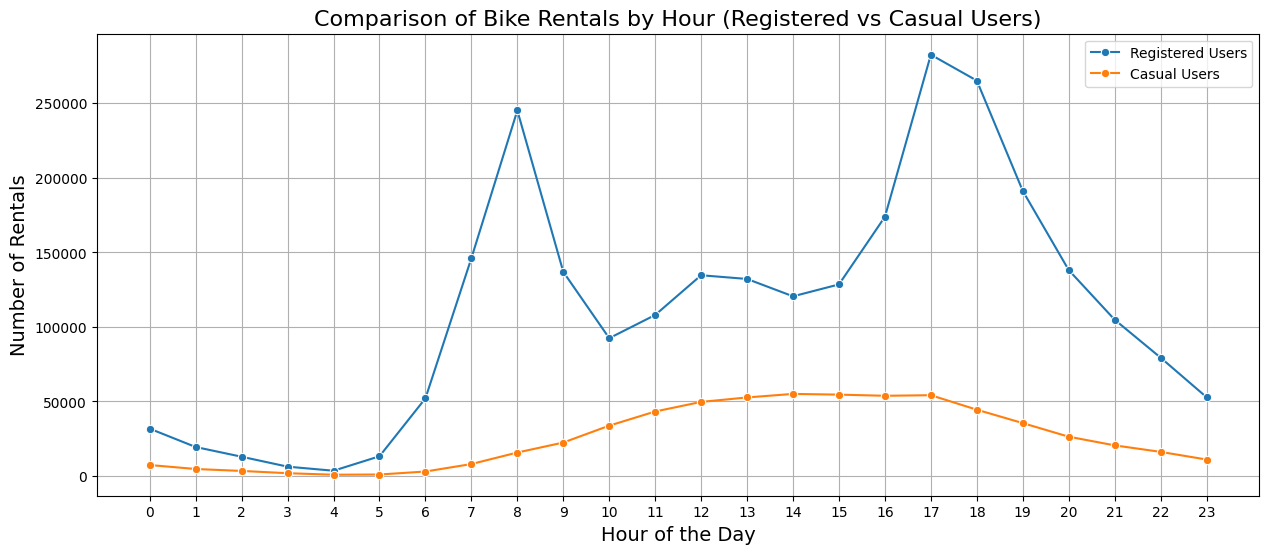

In [29]:
# Plot
plt.figure(figsize=(15, 6))
sns.lineplot(x="hours", y="registered", data=hourly_usage, label="Registered Users", marker="o")
sns.lineplot(x="hours", y="casual", data=hourly_usage, label="Casual Users", marker="o")

# Konfigurasi plot
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Number of Rentals", fontsize=14)
plt.title("Comparison of Bike Rentals by Hour (Registered vs Casual Users)", fontsize=16)
plt.xticks(range(0, 24))  # Menampilkan semua jam di sumbu x
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

Terlihat pada grafik tersebut perbedaa jumlah yang signifikan dari pengguna biasa dan terdaftar dimana selisih jumlah tertinggi sampai 200000 pada jam 17 PM  

### Pertanyaan 3: Bagaimana performa penjualan perusahaan dalam beberapa tahun terakhir?

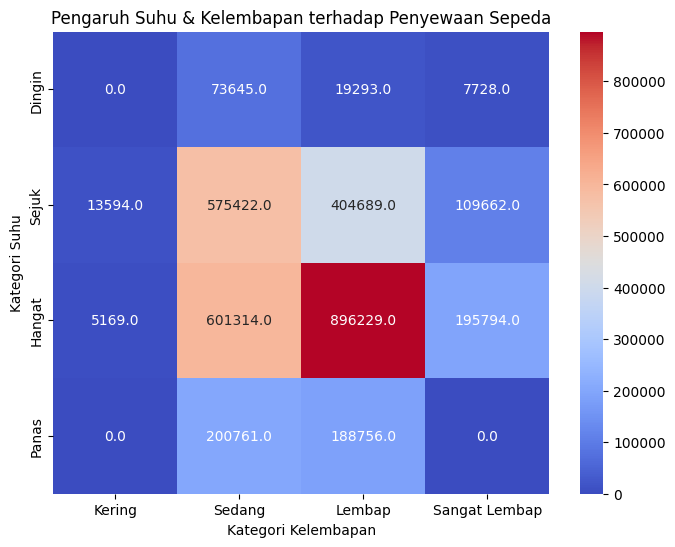

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Pengaruh Suhu & Kelembapan terhadap Penyewaan Sepeda")
plt.xlabel("Kategori Kelembapan")
plt.ylabel("Kategori Suhu")
plt.show()

Berdasarkan visualisasi di atas, kita dapat menngetahui faktor suhu dan kelembapan sangat mempengaruhi jumlah penyewaan sepeda dimana pada kondisi panas kering, panas sangat lembap dan dingin kering tidak ada yang menyewa sepeda tetapi pada kondisi hangat dan lembap jumlah penyewaan tertinggi sampai 896229 penyewa.


## Conclusion

Pertanyaan:<br>
- **Kapan waktu dengan jumlah penyewaan sepeda tertinggi dan terendah?**  
- **Apakah pengguna registered lebih sering menyewa sepeda pada jam tertentu dibandingkan pengguna casual?**  
- **Apakah suhu dan kelembaban memiliki dampak signifikan terhadap jumlah penyewaan?**

- Conclution pertanyaan 1:penyewaan sepeda paling banyak digunakan pada jam 17:00 sekitar 336860 penyewaan. Kontras dengan hal tersebut, penyewaan pada jam 04:00 merupakan produk yang paling sedikit terjual sekitar 4428 penyewaan.



- conclution pertanyaan 2: Terlihat pada grafik tersebut perbedaa jumlah yang signifikan dari pengguna biasa dan terdaftar dimana selisih jumlah tertinggi sampai 200000 pada jam 17 PM.
- conclution pertanyaan 3: Berdasarkan visualisasi di atas, kita dapat menngetahui faktor suhu dan kelembapan sangat mempengaruhi jumlah penyewaan sepeda dimana pada kondisi panas kering, panas sangat lembap dan dingin kering tidak ada yang menyewa sepeda tetapi pada kondisi hangat dan lembap jumlah penyewaan tertinggi sampai 896229 penyewa.
